### Credit Scoring 

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1 - Read data and information about it

In [35]:
import os
import numpy as np
from matplotlib import pyplot

import pandas as pd 

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_train.csv')

In [36]:
df.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,34,1,2,6,2,13,12,1,12,1,0,0.0,0,0,0,-,1
1,0,38,1,1,5,1,10,7,1,13,1,2,0.0,0,0,0,-,1
2,0,35,1,2,4,2,9,8,1,13,4,1,1.0,1,0,0,-,1
3,0,27,1,1,5,2,13,7,1,12,1,2,1.0,0,0,0,-,1
4,0,32,1,2,4,2,10,7,1,13,3,1,2.0,1,0,0,-,1


In [37]:
df.tail()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
8702,1,38,1,2,4,1,16,12,2,9,1,1,3.0,1,0,0,0,0
8703,1,32,1,2,4,1,4,1,2,12,1,1,1.5,1,0,0,0,0
8704,1,24,1,1,7,1,5,10,1,4,1,1,0.0,0,0,0,0,0
8705,1,31,1,2,4,1,1,6,2,7,1,1,0.0,0,3,6,237,0
8706,1,40,1,2,4,1,5,4,1,2,1,1,0.0,0,3,6,263,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   label                 8707 non-null   int64  
 1   Age                   8707 non-null   int64  
 2   Language              8707 non-null   int64  
 3   Sex                   8707 non-null   int64  
 4   Marital               8707 non-null   int64  
 5   Has_Credit            8707 non-null   int64  
 6   Field                 8707 non-null   int64  
 7   Month_of_birth        8707 non-null   int64  
 8   Day_of_birth          8707 non-null   int64  
 9   Region                8707 non-null   int64  
 10  Number_of_credits     8707 non-null   int64  
 11  Linked_cards          8707 non-null   int64  
 12  INPS_mln_sum          8707 non-null   float64
 13  INPS_yes_no           8707 non-null   int64  
 14  Score_level           8707 non-null   int64  
 15  Score_class          

###  data Define "Null" values


In [39]:
df.isnull().sum()

label                   0
Age                     0
Language                0
Sex                     0
Marital                 0
Has_Credit              0
Field                   0
Month_of_birth          0
Day_of_birth            0
Region                  0
Number_of_credits       0
Linked_cards            0
INPS_mln_sum            0
INPS_yes_no             0
Score_level             0
Score_class             0
Score_point             0
Changed_phone_number    0
dtype: int64

In [40]:
df.shape

(8707, 18)

2 - Data cleaning and preparation

In [41]:
df2 = df
df2.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,34,1,2,6,2,13,12,1,12,1,0,0.0,0,0,0,-,1
1,0,38,1,1,5,1,10,7,1,13,1,2,0.0,0,0,0,-,1
2,0,35,1,2,4,2,9,8,1,13,4,1,1.0,1,0,0,-,1
3,0,27,1,1,5,2,13,7,1,12,1,2,1.0,0,0,0,-,1
4,0,32,1,2,4,2,10,7,1,13,3,1,2.0,1,0,0,-,1


2.2. the data is given in some columns "-", we replace it with NaN

In [42]:
df2 = df2.replace({'-':np.nan})
df2.shape

(8707, 18)

2.3. Integer is the number of data objects in the "object" memory

In [43]:
columns  = df2.columns

for c in list(columns):
  df2[c] = df2[c].astype('float64')

2.4. Analysis of column values ​​obtained as blank - NaN

In [44]:
def missing_values_table(mydf):
        
        mis_val = mydf.isnull().sum()

        mis_val_percent = 100 * mydf.isnull().sum() / len(mydf)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        
        columns = {0 : 'Values ​​are missing', 1 : '% What is the percentage of the full column'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% What is the percentage of the full column', ascending=False).round(1)
       
        
        return mis_val_table_ren_columns

In [45]:
missing_values_table(df2)

,Values ​​are missing,% What is the percentage of the full column
Score_point,590,6.8


2.5. Missing - Remove column greater than 30% of Null values

In [46]:
missing_df = missing_values_table(df2);
missing_columns = list(missing_df[missing_df['% What is the percentage of the full column'] >6].index)
print('We remove% d columns.' % len(missing_columns))

We remove 1 columns.


In [47]:
df2 = df2.drop(columns = list(missing_columns))

In [48]:
df2.shape

(8707, 17)

# 3.2. We can copy the data to a new DataFrame so as not to lose it.

In [49]:
df3=df2

4 - Analyze the graphical appearance of the data (EDA)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


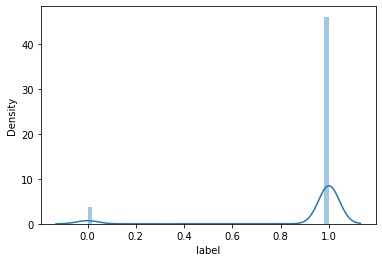

In [50]:
import seaborn as sns

sns.distplot(df3['label'])

4.2. Korelasia view

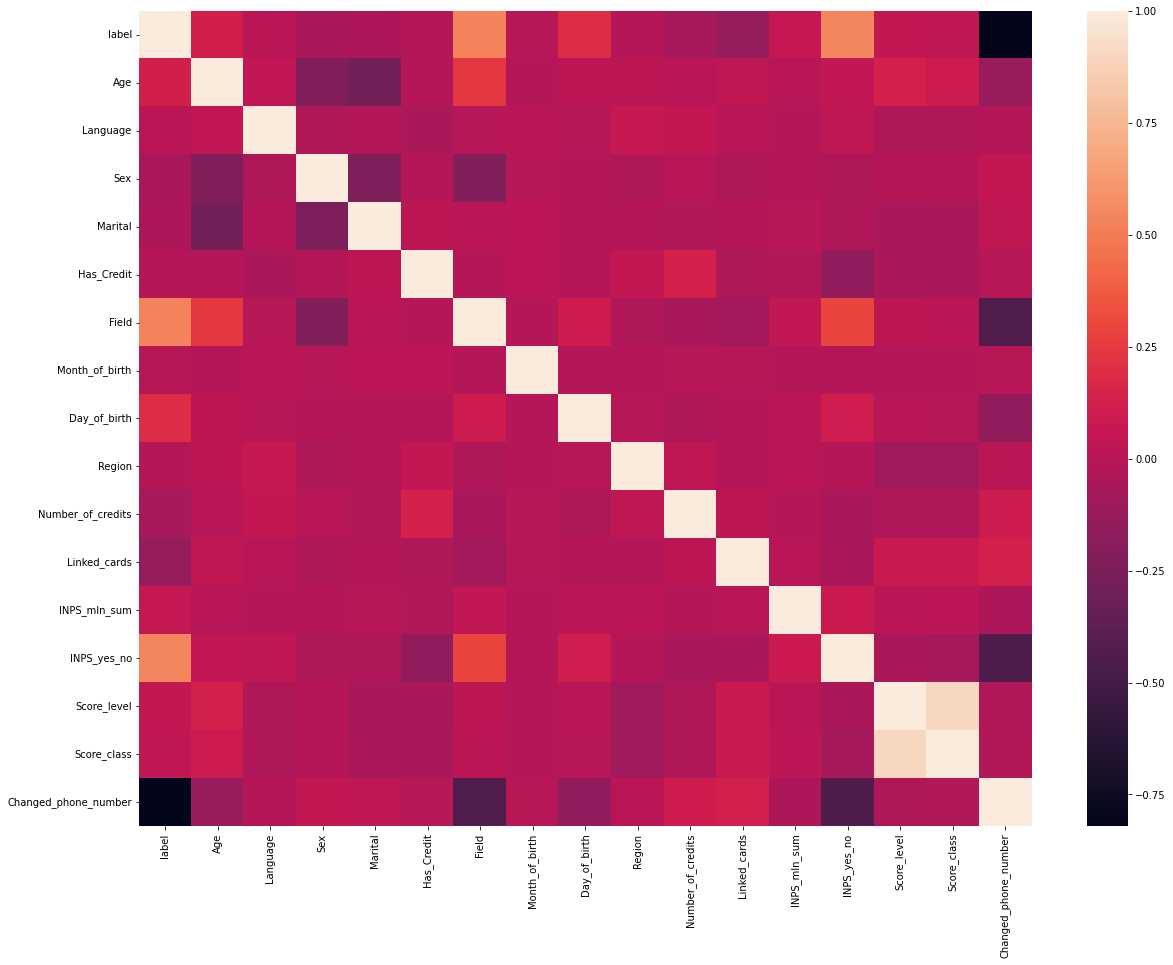

In [51]:
pyplot.subplots(figsize=(20,15))
sns.heatmap(df3.corr())

In [52]:
# Create correlation matrix
df3.corr()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Changed_phone_number
label,1.000000,0.123461,0.014345,-0.051501,-0.039957,-0.013534,0.530324,0.001617,0.190716,-0.005306,-0.072519,-0.135919,0.054180,0.543770,0.047349,0.037060,-0.820768
Age,0.123461,1.000000,0.040512,-0.227971,-0.283462,-0.014417,0.239177,-0.003929,0.030913,0.031262,0.009925,0.036998,0.007822,0.046266,0.130661,0.095699,-0.117304
Language,0.014345,0.040512,1.000000,-0.032256,-0.007205,-0.048083,-0.002069,0.015089,0.003632,0.075075,0.046960,0.010812,-0.004001,0.034626,-0.034816,-0.030085,-0.010279
Sex,-0.051501,-0.227971,-0.032256,1.000000,-0.243037,-0.006288,-0.221835,-0.000964,-0.015630,-0.024944,0.008876,-0.034225,-0.016264,-0.026638,-0.012416,-0.004048,0.048469
Marital,-0.039957,-0.283462,-0.007205,-0.243037,1.000000,0.030411,0.016817,0.018724,-0.006846,-0.016744,-0.017860,-0.007904,-0.000283,-0.026435,-0.059917,-0.055429,0.038050
Has_Credit,-0.013534,-0.014417,-0.048083,-0.006288,0.030411,1.000000,-0.005047,0.020932,-0.006464,0.051867,0.134337,-0.025098,-0.021449,-0.155647,-0.057921,-0.057047,0.001375
Field,0.530324,0.239177,-0.002069,-0.221835,0.016817,-0.005047,1.000000,-0.009669,0.095333,-0.032443,-0.066323,-0.076464,0.039892,0.294541,0.027281,0.015345,-0.441427
Month_of_birth,0.001617,-0.003929,0.015089,-0.000964,0.018724,0.020932,-0.009669,1.000000,-0.004538,-0.006085,0.004101,-0.000838,-0.008204,-0.005932,-0.010995,-0.013739,0.004093
Day_of_birth,0.190716,0.030913,0.003632,-0.015630,-0.006846,-0.006464,0.095333,-0.004538,1.000000,0.000326,-0.026389,-0.013717,0.013210,0.109631,0.010815,0.001109,-0.154565
Region,-0.005306,0.031262,0.075075,-0.024944,-0.016744,0.051867,-0.032443,-0.006085,0.000326,1.000000,0.039482,-0.007468,0.016581,-0.003269,-0.089168,-0.093514,0.014111


5 - Train the Linear Regeression Model

In [53]:
y = df3['label']

In [54]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [55]:
x = df3.drop(['label'], axis = 1, inplace=False)

#inplace = False means the drop column will be less than DF3

In [56]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
x_ros, y_ros = ros.fit_resample(x, y)
# new class distribution 
print(Counter(y_ros))

Counter({0.0: 8037, 1.0: 8037})


## 5.3. Create a Model ( SVC Model)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.svm import SVC

In [59]:
model = SVC()

In [60]:
model.fit(x_ros,y_ros)

SVC()

### 6.3. Calculate the probability for 2020 and see the clear difference.

In [61]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_test.csv')
y_test = data['label']
data = data.drop(['Score_point'], axis = 1, inplace=False)
X_test = data.drop(['label'], axis = 1, inplace=False)

In [62]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
x_ros, y_ros = ros.fit_resample(X_test, y_test)
# new class distribution 
print(Counter(y_ros))

Counter({0: 26, 1: 26})


In [63]:
predictions = model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
print(accuracy_score(y_test,predictions))

1.0


In [66]:
print("Mean squared error: %.2f" % np.mean((predictions - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

Mean squared error: 0.00
Variance score: 1.00
